Parse phastcon scores .wigfix file

In [6]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import re

%matplotlib notebook

In [2]:
IN_2L = False
counter = 0
values_2L = []
with open('dm6.27way.phastCons.wigFix') as f:
    for line in f:
        if 'fixedStep' in line: 
            pattern = re.compile(r'^fixedStep\schrom=chr(\w*)\s\w*=(\d*)\s\w*=(\d)')
            match = pattern.match(line)
            
            chrom = match.group(1)
            start = int(match.group(2))
            step = int(match.group (3))
            
            if chrom=="2L":
                IN_2L = True
                counter = start
            else:
                IN_2L = False
        else:
            if IN_2L:
                row = (chrom, counter , float(line.strip()))
                values_2L.append(row)
                counter += step
print(np.vstack(values_2L[:5]))

[['2L' '444' '0.152']
 ['2L' '445' '0.146']
 ['2L' '446' '0.139']
 ['2L' '447' '0.131']
 ['2L' '448' '0.123']]


In [3]:
df = pd.DataFrame(values_2L, columns=['chrom','position','score'])
df.head()

,chrom,position,score
0,2L,444,0.152
1,2L,445,0.146
2,2L,446,0.139
3,2L,447,0.131
4,2L,448,0.123


<IPython.core.display.Javascript object>


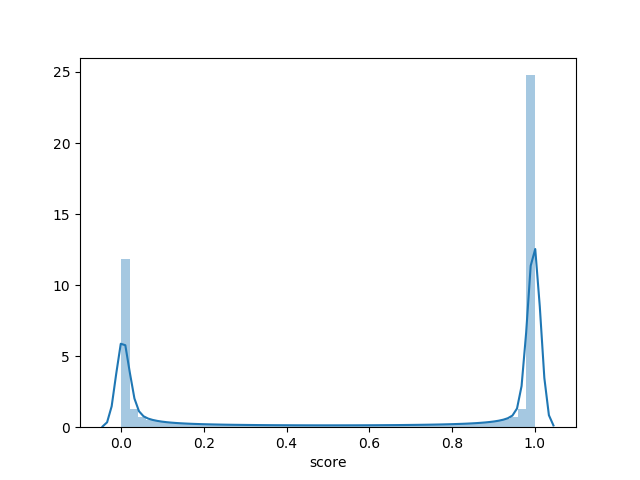

In [8]:
sb.distplot(df["score"])

In [9]:
df.shape

(21701996, 3)